# Naredbe programskog toka

Sadržaj:
1. [For petlja](#For-petlja)
1. [Operatori sa bool izlazom](#Operatori-sa-bool-izlazom)
    1. [Operatori poređenja](#Operatori-poređenja)
    1. [Kvantifikatori](#Kvantifikatori)
    1. [Logički operatori](#Logički-operatori)
    1. [Prioritet izvršenja operatora](#Prioritet-izvršenja-operatora)
1. [Naredbe grananja](#Naredbe-grananja)
    1. [Naredba `if`](#Naredba-if)
    1. [Ugnježdene `if` naredbe](#Ugnježdene-if-naredbe)
    1. [Lančano uslovno grananje](#Lančano-uslovno-grananje)
1. [While petlja](#While-petlja)

In [1]:
import numpy as np
import numpy.random as rndm
from timeit import default_timer as timer

## For petlja

Jedna od osnovnih karakteristika rada na računaru jeste mogućnost ponavljanja jedne ili više operacija proizvoljan broj puta. U numeričkoj matematici programski blokovi koji se ponavljaju više puta za poboljšanje neke računate vrednosti nazivaju se iteracije. Veoma je bitno definisati, tj. ograničiti broj izvršenih iteracija kako bi se do rezultata došlo u konačno mnogo koraka. Kada je broj neophodnih iteracija poznat, za programsku realizaciju iteracija pogoduje `for` petlja.
Njena sintaksa je:
```python
for indeks in iterativni_objekat:
    telo_petlje
```

**indeks** označava ime promenljive čijim skupom vrednosti je definisan ukupan broj iteracija. **iterativni_objekat** je domen promenljive **indeks**. Taj objekat mora da bude nekog od iterativnih tiova podataka kao što su lista, niz, string, itd.
Telo petlje čini skup instrukcija koje je potrebno ponavljati pri svakoj iteraciji. Python ih prepoznaje na osnovu simbola `:` i jednakim uvlačenjem reda za svaku od instrukcija. Kraj tela petlje označava prva naredba koja je bez uvučenog reda, ili kraj kodne ćelije.



Za kratak uvod u iteracije možete pogledati i [video](https://www.youtube.com/watch?v=X1-UNHUajfk&feature=emb_title) na engleskom jeziku.

**Primer 1.** U sledećoj kodnoj ćeliji promenljiva **indeks** nosiće oznaku **ime**, imaće skup vrednosti od tri elementa zadata listom \["Raja", "Gaja", "Vlaja"\]. Zbog toga će telo petlje da se izvrši tri puta. Prvi red koda koji nije uvučen označava završetak petlje i mesto odakle počinju instrukcije koje se izvršavaju po izlasku iz **for** petlje. Drugim rečima, Python koristi tabulaciju za oznake blokova koda koji se npr. u C-u izdvajaju zagradama \{\}.

In [2]:
prolaz=0
for ime in ["Raja", "Gaja", "Vlaja"]:
    print(ime, "je Pajin sestrić")
    prolaz+=1
    print("Ovo je iteracija broj ",prolaz)
print("Ovo nije deo petlje")    

Raja je Pajin sestrić
Ovo je iteracija broj  1
Gaja je Pajin sestrić
Ovo je iteracija broj  2
Vlaja je Pajin sestrić
Ovo je iteracija broj  3
Ovo nije deo petlje


Slično je kreirana i naredna **for** petlja.

In [3]:
for voće in ['jabuka','šljiva','dunja','višanja']:
    print('Pita od ', voće)

Pita od  jabuka
Pita od  šljiva
Pita od  dunja
Pita od  višanja


For petlja se veoma često koristi u kombinaciji sa naredbom [range](https://docs.python.org/3.3/library/stdtypes.html?highlight=range#ranges) koja ima efekat na vrednosti sličan naredbi NumPy **arange**. Sam poziv funkcije ima sledeću strukturu:
```python
range([start=0,] stop [,korak=1])
```
**Start** i **korak** su opcioni argumenti u pozivu. Ukoliko se ne navedu, podrazumevane vrednosti su $0$ i $1,$ redom. Obratiti pažnju na poslednji element liste generisan ovom funkcijom, vrednost **stop** je granica koja se ne postiže. Kroz naredne kodne ćelije upoznaćemo specifičnost ove naredbe.

In [4]:
range(6)

range(0, 6)

In [5]:
list(range(6))  #prevođenje range u listu

[0, 1, 2, 3, 4, 5]

In [6]:
range(1,9,2)

range(1, 9, 2)

In [7]:
list(range(1,9,2))   #prevođenje range u listu

[1, 3, 5, 7]

Ovaj mali eksperiment pokazuje da je izlaz naredbe **range** specijalan objekat koji može lako da se prevede u listu upotrebom naredbe **list()**.  Pojedinačni elementi objekata tipa **range** generišu se jedan po jedan isključivo po potrebi. To upravo odgovara strukturi naredbe **for** gde promenljiva koja je indeks petlje za svaku iteraciju uzima tačno jednu vrednost. Oponašajući ovakav način generisanja vrednosti **range** tip čuva memorijski prostor ne generišući objekat tipa lista za skup svih vrednosti indeksa. 

Primer kombinacije naredbi **for** i **range** dat je narednom kodnom ćelijom. 

In [8]:
for x in range(6,-6,-3):
    print(x)

6
3
0
-3


**Primer 2.** Ušteda memorijskog prostora naredbe **range** dolazi uz manju razliku u vremenu izvršenja. U narednom primeru merićemo vreme izvršenja **for** petlje nad listom i **range** tipom iste dužine.

In [9]:
start = timer()
for indeks in range(10000):
    b=indeks
end = timer()
print(end - start) # Vreme je izraženo u sekundama    

0.0011245000059716403


In [10]:
lista=list(range(10000))

In [11]:
start = timer()
for indeks in lista:
    b=indeks
end = timer()
print(end - start)    

0.0021577000006800517


## Operatori sa bool izlazom

Python svojom bibliotekom **NumPy**, i srodnim bibliotekama koje se oslanjaju na nju, je programski jezik koji koristi visoku paralelizaciju izračunavanja. Zbog toga ćemo kroz glavni tip podataka `NumPy arrays` da upoznamo operatore kojima se maksimalno izbegava eksplicitna upotreba naredbi grananja ili petlje.

Logički izraz je svaki izraz čija je vrednost tačno ili netačno, tj. svaki izraz koji evaluira u tačno jednu logičku vrednost. Python poseduje veliki broj funkcija koje generišu ili koriste izlaz tipa `bool`. U nastavku upoznaćemo neke važnije od njih kroz primere.

### Operatori poređenja

Operator jednakosti `==` poredi vrednosti dva objekta i u zavisnosti od njihove jednakosti proizvodi logičku vrednost tačno ili netačno.
Operator jednakosti `==` jedan je od $6$ standardnih operatora poređenja. Preostali su:

|operator poređenja|$\phantom{WWWWWWWWWWWW}$|objašnjenje|
|---|---|---|
|$x$ != $y$|         |$x$ je različito od $y$|
|$x$ > $y$|          |$x$ je veće od $y$|
|$x$ < $y$|          |$x$ je manje od $y$|
|$x$ >= $y$|         | $x$ je veće ili jednako od $y$|
|$x$ <= $y$|         | $x$ je manje ili jednako $y$|

<div class="alert alert-block alert-info">
<b>Napomena:</b>
Obratiti pažnju da je u Pythonu simbol `=` rezervisan za dodelu vrednosti, dok se poređenje vrednosti postiže sa `==`.
</div>

In [12]:
5==5

True

In [13]:
5==6

False

In [14]:
5<=6

True

**Zadatak 1.** Od datih izraza, koji sve predstavljaju logički izraz (bilo tačan ili netačan)? 

- [x] A. True
- [x] B. 3 == 4
- [ ] C. 3 + 4
- [x] D. 3 + 4 == 7
- [ ] E. "False"
- [ ] F. a = 3 + 4

Kada se neki od operatora poređenja primeni na  NumPy nizove, poređenje se vrši član po član. 

In [15]:
niz_a=np.arange(6)
niz_b=np.array([0.0,1.0,2.0,3.0,4.0,5.0])
niz_c=niz_a.reshape(2,3)
print(niz_a==3)
print(niz_a==niz_b)
print(niz_a==niz_c)  #nisu istih dimenzija

[False False False  True False False]
[ True  True  True  True  True  True]
False


C:\Users\jovan\AppData\Local\Temp\ipykernel_2216\3707415625.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(niz_a==niz_c)  #nisu istih dimenzija


In [16]:
print(niz_a<=3)

[ True  True  True  True False False]


In [17]:
print(niz_a!=3)

[ True  True  True False  True  True]


Na taj način možemo lako da prevodimo i nizove brojevnih ili drugih vrednosti u logičke nizove. Na primer, svaka pozitivna vrednost može da se smatra "tačnom", inače je netačna. 

In [18]:
indikator=rndm.randint(-2,2,6)
print(indikator)

[-1 -2  0 -2 -2  0]


In [19]:
indikator.astype(bool)

array([ True,  True, False,  True,  True, False])

In [20]:
indikator!=0

array([ True,  True, False,  True,  True, False])

Nizovi logičkih vrednosti pogodni su da se koriste za indeksiranje drugih nizova.

In [21]:
niz1=rndm.randint(5,21,size=(2,3))
niz2=rndm.randint(5,21,[2,3])
print(niz1)
print(niz2)

[[ 6 14  8]
 [ 7 10 16]]
[[14  7  6]
 [17 13  6]]


In [22]:
print(niz1)
niz_bool=((niz1/2) >= (niz2/3))
print(niz_bool)
print(niz1[niz_bool])

[[ 6 14  8]
 [ 7 10 16]]
[[False  True  True]
 [False  True  True]]
[14  8 10 16]


In [23]:
np.sum(niz1[niz1>=15])  #sabiranje elemenata matrice niz1 koji su veći ili jednaki od 15

16

In [24]:
A=(np.arange(16)).reshape(4,4)
Ind=rndm.randint(2,size=(4,4),dtype=bool)
print(A)
print(Ind)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[False False False  True]
 [False False  True False]
 [False  True False False]
 [ True False False  True]]


In [25]:
print(A[Ind])

[ 3  6  9 12 15]


Takvo indeksiranje može da se kombinuje sa dodelom vrednosti.

In [26]:
B=np.zeros((4,4))
B[Ind]=A[Ind]
B

array([[ 0.,  0.,  0.,  3.],
       [ 0.,  0.,  6.,  0.],
       [ 0.,  9.,  0.,  0.],
       [12.,  0.,  0., 15.]])

U primerima u nastavku korišćene su ugrađene NumPy funkcije iz tabele.
|Funkcija|Dejstvo|
|:---|:---|
|`extract`|Vraća vrednosti elemenata niza koji zadovoljavaju dati uslov|
|`argwhere`|Vraća indekse elemenata niza čije vrednosti zadovoljavaju dati uslov|
|`where`|Vraća vrednosti jednog od dva niza na osnovu datog pravila|
|`select`|Vraća vrednosti jednog od više nizova na osnovu datih pravila|

**Primer 3.** Nizovi logičkih vrednosti mogu da se koriste za indeksiranje drugih nizova. To se postiže ili član-po-član označavanjem elemenata za pristup, ili u kombinaciji sa operatorom indeksiranja `[ ]` na način koji je poznat od ranije.
Takav način indeksiranja pogodan je za kombinovanje sa numeričkim operacijama nad nizovima ili kao print opcije.

Možemo iz niza da izdvojimo samo vrednosti koje zadovoljavaju neki uslov, ili pozicije takvih elemenata.

In [27]:
print(niz1)
niz_bool=((niz1/2) >= (niz2/3))
print(niz_bool)
print(niz1[niz_bool])

[[ 6 14  8]
 [ 7 10 16]]
[[False  True  True]
 [False  True  True]]
[14  8 10 16]


In [28]:
np.sum(niz1[niz1>=15])  #sabiranje elemenata matrice niz1 koji su veći ili jednaki od 15

16

In [29]:
vektor=np.array([-2,1,3,-1,7,-8,9,1,-2])
print(vektor)

[-2  1  3 -1  7 -8  9  1 -2]


In [30]:
print(vektor[vektor<5])
np.extract(vektor<5, vektor)

[-2  1  3 -1 -8  1 -2]


array([-2,  1,  3, -1, -8,  1, -2])

Ako su vektori istih dimenzija mogu da se kombinuju za ekstrakciju elemenata.

In [31]:
vektor.shape

(9,)

In [32]:
pom=rndm.randint(-3,3,(9,))
pom

array([-2,  1, -3, -2,  1, -3,  0, -2, -2])

In [33]:
vektor[pom>0]

array([1, 7])

In [34]:
np.argwhere(pom>0)

array([[1],
       [4]], dtype=int64)

In [35]:
vektor[np.argwhere(pom>0)]

array([[1],
       [7]])

Naredba `where` i `select` funkcionišu po principu *cases* naredbe. Prikazaćemo transformaciju sadržaja niza `pom` tako da se vrednosti $0$ prevedu u $-1,$ a sve nenula vrednosti da budu kvadrirane.

In [36]:
np.where(pom==0,pom-1,pom**2)

array([ 4,  1,  9,  4,  1,  9, -1,  4,  4])

Pobajte sami da protumačite naredni kodni zahtev.

In [37]:
print(vektor)
np.where(vektor%3==0,-vektor,vektor)

[-2  1  3 -1  7 -8  9  1 -2]


array([-2,  1, -3, -1,  7, -8, -9,  1, -2])

Kada postoji više nizova i uslova za izbor primenjujemo `select`. 

In [38]:
print(vektor)
np.select([vektor%3==0,vektor%3==1,vektor%3==2],[-vektor,2*vektor,vektor-1])

[-2  1  3 -1  7 -8  9  1 -2]


array([ -4,   2,  -3,  -2,  14, -16,  -9,   2,  -4])

***

### Kvantifikatori

Osim član po član rezultata poređenja nad nizovima mogu da se koriste i objedinjeni rezultati. To se postiže primenom kvantifikatora ili specijalizovanih funkcija. Jedna od takvih je `array_equal` za poređenje jednakosti dva niza.

In [39]:
print(np.array_equal(niz_a,3))
print(np.array_equal(niz_a,niz_b))
print(np.array_equal(niz_a,niz_c))

False
True
False


Za poređenja nad elementima nizova koja koriste kvantifikatore $\exists$ i $\forall,$ NumPy nudi sledeće opcije:

- `numpy.any` - da li postoji ijedan tačan element logičkog niza
- `numpy.all` - da li su svi elementi logičkog niza **True**

Uz pomoć ovih naredbi dobijaju se željeni "kumulativni" rezultati nekog član-po-član rezultata.

In [40]:
print(np.any((niz1/2) >= (niz2/3)))
print(np.all((niz1/2) >= (niz2/3)))

True
False


**Primer 4.** Kada se radi sa NumPy nizovima čiji su elementi realni brojevi, u nekim situacijama bitno je poređenje do na prihvaćeni nivo greške, a ne potpune jednakosti nizova. Tada se definiše nivo dozvoljene različitosti među vrednostima dva niza, tj. opisuje se tolerancija greške između vrednosti koje se porede.  Tolerancija može da se definiše kao relativna ili apsolutna greška. Ovakav način poređenja se postiže naredbom `numpy.isclose` i njenim opcijama **rtol** i **atol** prema sledećem pravilu.
$$isclose(\widehat{a},a,rtol,atol)=True\quad\Longleftrightarrow\quad|a - \widehat{a}| \leq (atol + rtol \cdot |a|)$$

In [41]:
niz_d=niz_b+1e-7
print(np.array_equal(niz_d,niz_b)) 

False


In [42]:
print(np.isclose(niz_d,niz_b))      #rtol=1e-5, atol=1e-8  podrazumevane vrednosti

[False  True  True  True  True  True]


In [43]:
print(np.abs(niz_b-niz_d)<=1e-8+1e-5*(np.abs(niz_b)))  #član-po-član provera uslova naredebe isclose

[False  True  True  True  True  True]


In [44]:
print(np.isclose(niz_d,niz_b,rtol=1e-5))   #definisana relativna greška,  atol=1e-8

[False  True  True  True  True  True]


In [45]:
print(np.abs(niz_b-niz_d)<=1e-8+1e-5*(np.abs(niz_b)))

[False  True  True  True  True  True]


In [46]:
print(np.isclose(niz_d,niz_b,atol=1e-6))   #definisana apsolutna greška,  rtol=1e-5

[ True  True  True  True  True  True]


In [47]:
print(np.abs(niz_b-niz_d)<=1e-6+1e-5*(np.abs(niz_b)))

[ True  True  True  True  True  True]


In [48]:
A = np.array([[1,2],[3,4]]) 
B = np.linalg.inv(A) 
print("A=",A)
print("B=",B)
print("AB=",A@B)
print(np.isclose(A@B,np.eye(2)))

A= [[1 2]
 [3 4]]
B= [[-2.   1. ]
 [ 1.5 -0.5]]
AB= [[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]
[[ True  True]
 [ True  True]]


### Logički operatori

Postoje tri logička operatora za operacije nad iskazima: `and`, `or` i `not`. Njihova uloga je logičkog **i**, **ili** i **negacije**, redom. Podsetićemo se tablica istinitosti ovih operacija.
<div>
   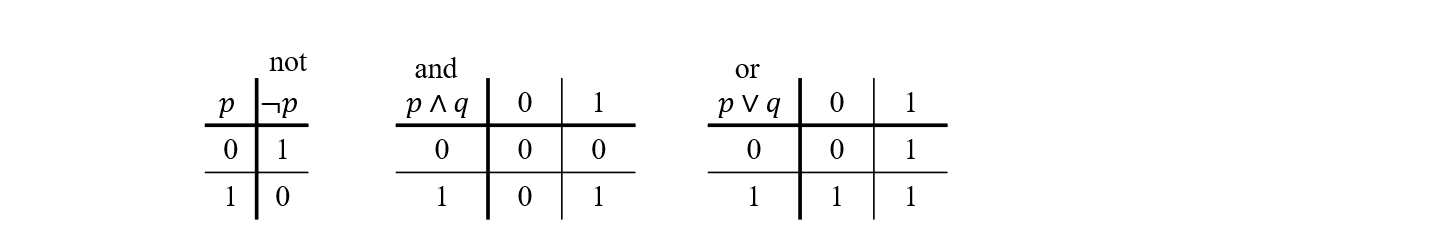  
</div>

**Primer 5.** Logički operatori i operatori poređenja se kombinuju za dobijanje složenih logičkih izraza.

In [49]:
x, y = 1.6, -3
print(x>=0 and x<8.3)
print(y>=0 and y<8.3)

n = 25
print(n%3 == 0 or n%7 == 1)
print(n%2 == 0 or n%5 == 0)

True
False
False
True


**Primer 5.** Godina je prestupna kada je deljiva sa 4, osim ako nije još i deljiva sa 100. Ako je deljiva i sa 400, onda jeste prestupna. Napisaćemo kod kojim se traži korisnički unos godine. Izlaz koda biće **True** ukoliko je korisnik uneo prestupnu godinu, u suprotnom izlaz će biti **False**.

Naredna tabela daje primere nekih prestupnih godina i onih koje to nisu.

|Godina|Prestupna|
|---|---|
|1944|Da|
|2011|Ne|
|1986|Ne|
|1800|Ne|
|1900|Ne|
|2000|Da|
|2056|Da|

In [51]:
godina=int(input("Unesite godinu:"))
prestupna= ((godina%4==0) and (godina%100!=0 or godina%400==0))
print(prestupna) 

Unesite godinu:12345
False


Za član-po-član primenu logičkih operatora nad nizovima bool tipa Python koristi tzv. [bitwise logičke operatore](https://wiki.python.org/moin/BitwiseOperators):

|Oznaka|Operacija|
|---|---|
|~|negacija|
|&|i, konjunkcija|
|\||ili, disjunkcija|
|^|XOR, ekskluzivno ili|

In [52]:
x = rndm.randint(0,10,(5,2))
print(x)
print((x > 2) & (x < 8))

[[1 0]
 [1 4]
 [9 1]
 [4 0]
 [8 2]]
[[False False]
 [False  True]
 [False False]
 [ True False]
 [False False]]


**Primer 6.** Nizom nenegativnih vrednosti data je mogućnost padavina u procentima za narednih nedelju dana. 
$$padavine\_procenti=\begin{bmatrix} 94.3&54&100&76.8&26&5.3&7.9\end{bmatrix}.$$
Napraviti niz preporuka prema sledećem pravilu:
- ako je procenat $\geq90$ pravilo je : "Ponesite kišobran"
- ako je $80\leq$ procenat $< 90$ pravilo je : "Prijaće biljkama"
- ako je $50\leq$ procenat $< 80$ pravilo je : "Biće oblaka"
- ako je procenat $< 50$ pravilo je : "Lepo vreme! Uživajte!"

In [53]:
padavine_procenat=np.array([94.3, 54, 100, 76.8, 26, 5.3, 7.9])
odgovori=np.array(["Lepo vreme! Uživajte!" for i in range(7)])
index90= padavine_procenat>=90
odgovori[index90]="Ponesite kišobran"
index80= (80<=padavine_procenat) & (padavine_procenat<90)
odgovori[index80]="Prijaće biljkama"
index50= (50<=padavine_procenat) & (padavine_procenat<80)
odgovori[index50]="Biće oblaka"
print(odgovori)

['Ponesite kišobran' 'Biće oblaka' 'Ponesite kišobran' 'Biće oblaka'
 'Lepo vreme! Uživajte!' 'Lepo vreme! Uživajte!' 'Lepo vreme! Uživajte!']


Indeksiranje logičkim nizovima olakšava postupke rada sa [funkcijama agregacije](https://www.pythonprogramming.in/numpy-aggregate-and-statistical-functions.html) pod nekim zadatim uslovima. Tako možemo npr. da prebrojimo dane koji imaju veliku šansu za padavine, recimo sa procentom preko 75.

In [54]:
np.count_nonzero(padavine_procenat>75)     #brojanje nenula elemenata, tj. True elemenata

3

Slično, možemo da odredimo srednju vrednost procenta mogućnosti padavina za dane sa bar 50% šanse za padavinama.

In [55]:
np.mean(padavine_procenat[padavine_procenat>=50])

81.275

***

### Prioritet izvršenja operatora

Aritmetičke operacije su starije u odnosu na sve operatore koji za rezultat vraćaju logičku (bool) vrednost. Dakle, Python će uvek prvo da izračunava vrednost aritmetičkog izraza. Sledeći po prioritetu su operatori poređenja, na kraju liste prioriteta su logički operatori. To smo mogli da uočimo u prethodnom primeru. 

Narednom tabelom data je Python hijerarhija različitih operatora. Kompletna lista operatora prema prioritetu u Pythonu može da se nađe u [Dokumentacionom centru](https://docs.python.org/3/reference/expressions.html#expression-lists).

|Nivo|Kategorija|Operatori|
|---|---|---|
|7|eksponent|$**$|
|6|množenje|$*$,/,//,%|
|5|sabiranje|+,-|
|4|poređenje|==,!=,<=,>=,>,<|
|3|logički|not,~|
|2|logički|and,&|
|1|logički|or,$||$|

## Naredbe grananja

Kada ugrađene funkcije za rad sa NumPy nizovima nisu dovoljne Python poseduje i odgovarajuće naredbe toka. Upoznaćemo njihovu sintaksu kroz primere.

### Naredba if



Najjednostavniji oblik naredbe uslovnog izbora je **if-else** naredba. Uslov grananja zadaje se logičkim izrazom. Upotreba ove naredbe vezana je za binarno grananje. Sintaksa glasi:

```python
if Bool_izraz:
    blok_naredbi_1        # izvršava se ukoliko je vrednost Bool_izraza True
else:
    blok_naredbi_2        # izvršava se ukoliko je vrednost Bool_izraza False
```
Obratite pažnju na simbol `:` koji označava početak programskog bloka odgovarajuće **if** grane. Blok naredbi svake grane sintaksno se uvlači jedan tab.

**Primer 7.** Napravićemo program kojim se za uneti ceo broj određuje da li je paran ili ne. Uvlačenje reda je deo obavezne Python sintakse i njime se određuje programski blok za svaku od **if-else** grana. Prekidom uvlačenja reda označava se deo programskog bloka izvan **if-else** grana, tj. sekvencijalni nastavak instrukcija.

In [56]:
x = int(input("Unesite neki ceo broj:"))

if x % 2 == 0:
    print(x, "je paran")
    print("I dalje traje True blok")
else:
    print(x, "je neparan")
    print("I dalje traje else blok")
print("Ovo nije deo if naredbe i uvek se štampa!")

Unesite neki ceo broj:123
123 je neparan
I dalje traje else blok
Ovo nije deo if naredbe i uvek se štampa!


Za primenu naredbe **if** nije neophodno koristiti **else** granu. Ovakva sintaksna forma koristi se u situaciji kada se kreira unarna selekcija, tj. kada se obrađuje neki izuzetak. 

Ne postoji ograničenje za broj instrukcija u bilo kojoj od **if** grana. Ali, svaka od otvorenih grana mora da sadrži bar jednu instrukciju u svom bloku.

**Primer 8.** Napisaćemo funkciju kojom se vraća lista delilaca nekog celog broja.

In [57]:
def faktori(broj):
    ListaFaktora = []
    if int(broj):
        for i in range(1,broj+1):
            if broj % i == 0:
                ListaFaktora.append(i)
    return ListaFaktora

In [58]:
faktori(25)

[1, 5, 25]

In [59]:
faktori(136)

[1, 2, 4, 8, 17, 34, 68, 136]

In [60]:
faktori(13)

[1, 13]

Koristeći funkciju **faktori** možemo da napravimo funkciju koja proverava da li je uneti broj prost.

In [61]:
def prost(p):
    lista=faktori(p)
    if len(lista)==2:
        return(True)
    else:
        return(False)

Napravićemo program koji primenjuje algoritam Eratostenovog sita za pronalaženje svih prostih brojeva manjih od broja $n.$ Vrednost broja $n$ dobija se kroz zahtev korisniku.

In [62]:
n=int(input('Unesite ceo broj:'))
print("Zadatak je naći proste brojeve u tabeli",list(range(1,n+1)))
prosti_brojevi=np.arange(2,n+1)
prosti_bool = np.ones(n-1,dtype=np.bool_)
p = 2
while (p * p <= n):
    if (prost(p) == True):
        # izbaciti sve brojeve oblika k*p počevši od 2p pa do n
        for i in range(p * 2, n + 1, p):
            prosti_bool[i-2] = False
    p += 1
print("Prosti brojevi su:",prosti_brojevi[prosti_bool])    

Unesite ceo broj:123
Zadatak je naći proste brojeve u tabeli [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123]
Prosti brojevi su: [  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113]


**Primer 9.** Kreiraćemo program koji za slučajnu matricu $A$ određuje Euklidove norme svih njenih vektora kolona. Ukoliko je norma vektora u opsegu $[1-tol,1+tol]$ za $tol=2e-2$ program će poslati poruku o tome. Dimenzije matrice se takođe određuju kao slučajni prirodni brojevi.

In [63]:
dimenzije=rndm.randint(4,15,(2,))
print(dimenzije)
A=rndm.uniform(-1,1,dimenzije)
tol=2e-2

for i in range(dimenzije[1]):
    kolona=A[:,i]
    norma=np.linalg.norm(kolona)
    if abs(1-norma)<=tol:
        print('Vektor kolona',i,'je skoro normirana')
        print(kolona)

[ 9 10]


**Primer 10.** Predstavićemo jedan nerešen problem u teoriji brojeva. Polazeći od proizvoljnog prirodnog broja $n$ ponavljaju se sledeći koraci:

- Za $n=1$ obustaviti postupak
- Za $n>1$ parno: $n=n/2$
- Za $n>1$ neparno: $n=3n+1$

Primetimo da kad god $n$ stigne do vrednosti $2^k$ opisani postupak se završi u narednih $k$ koraka. Pitanje koje i dalje odoleva odgovoru je: da li se za svaki prirodan broj $n$ postupak uvek završi. Dosadašnji eksperimenti ukazuju na potvrdan odgovor, međutim za konačnu potvdu nedostaje formalan dokaz takve tvrdnje. Ovaj problem poznat je kao [$3n+1$ problem](https://en.wikipedia.org/wiki/Collatz_conjecture). U nastavku predstavljen je kod kojim se ispisuje niz koraka za proizvoljno uneto $n\in\mathbb{N}.$

In [64]:
n=int(input('Unesite neki prirodan broj:'))

y=[n];
while n>1:
    if n%2==1:
         n=3*n+1            
    else:
         n=n//2
    y=y+[n]
print(y) 

Unesite neki prirodan broj:123
[123, 370, 185, 556, 278, 139, 418, 209, 628, 314, 157, 472, 236, 118, 59, 178, 89, 268, 134, 67, 202, 101, 304, 152, 76, 38, 19, 58, 29, 88, 44, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]


### Ugnježdene if naredbe


Više funkcija **if** mogu da se ugnezde jedna unutar druge kako bi se omogućilo granjanje po više kriterijuma.

**Primer 11.** Pretpostavimo da su date dve promenljive $x$ i $y$ sa numeričkim vrednostima. Ukoliko želimo da prikažemo obaveštenja o odnosu vrednosti ova dva broja: koji je veći ili su jednaki, za to može da se koristi sledeći kod.

In [65]:
x=float(input("Unesite broj x:"))
y=float(input("Unesite broj y:"))
if x < y:
    print("x je manji od y")
else:
    if x > y:
        print("x je veći od y")
    else:
        print("x i y su jednaki")

Unesite broj x:12
Unesite broj y:13
x je manji od y


Spoljašnja **if** naredba sadrži dve grane, od kojih druga grana (else) sadrži još jednu **if** naredbu. I ova unutrašnja **if** naredba sadrži dve grane. Vizuelno pronalaženje naredbi if i uklapanje njenih grana u Python kodu ne predstavlja problem zbog struktuiranja programskih blokova jednakim uvlačenjem reda. Ipak, ovakav način zapisa višestrukog grananja može da bude naporan za unos. Zbog toga Python poseduje oblik **if** naredbe za lančano grananje. 

### Lančano uslovno grananje

Drugačiji način zapisa ugnježdenih **if** naredbi omogućen je rezervisanom reči **elif**. Ovom rezervisanom reči omogućeno je sukcesivna provera tačnosti logičkih izraza. Sintaksa je
```python
if uslov_1:
    blok_1
elif uslov_2:
    blok_2
...
elif uslov_n:
    blok_n
else:
    blok_n+1
```    
U nizu mogućih grananja izvršiće se blok prvog grananja čiji logički izraz `uslov_k` ima vrednost **True**. Ne postoji ograničenje za broj uslovnih grananja, tj. broj `elif` naredbi, ali samo jedno `else` može stajati na kraju. Blok instrukcija iz else grane se izvršava samo u slučaju da nijedno prethodno grananje nije bilo realizovano. I u ovom slučaju, postojanje `else` grane nije obavezno, već predstavlja opcioni deo koda.

**Primer 12.** Kod iz primera 11. možemo da preradimo tako da dobije izgled lančanog grananja.

In [66]:
x=float(input("Unesite broj x:"))
y=float(input("Unesite broj y:"))
if x < y:
    print("x je manji od y")
elif x > y:
    print("x je veći od y")
else:
    print("x i y su jednaki")

Unesite broj x:12
Unesite broj y:13
x je manji od y


**Primer 13.** Programski kod sa nešto više uslovnih grananja može da ide i na sledeći način.

In [67]:
br_godina = int(input("Unesite broj godina:"))
if br_godina < 18:
    print("U koju školu ideš?")
elif (18 <= br_godina)and(br_godina < 26):
    print("Da li pohađaš fakultet?")
elif 26 <= br_godina < 30:
    print("Gde radiš?")
elif 30 <= br_godina < 50:
    print("Da li si u braku?")
else:
    print("Bre, baš si mator!")

Unesite broj godina:123
Bre, baš si mator!


**Zadatak 2.** Kreiran je kod koji koristi lančane naredbe **if**. Ne menjati osnovni kod. Pronaći celobrojnu vrednost x za koju će dati kod proizvesti izlaz u obliku liste `["Jeste" , "Nije"]`.

In [68]:
x = int(input("Unesite broj x:"))
output = []

if x > 51:
    output.append("Jeste")
elif x > 30:
    output.append("Nije")
else:
    output.append("Ni jedno ni drugo")

if x > 86:
    output.append("Jeste")
else:
    output.append("Nije")
    
print(output)

Unesite broj x:123
['Jeste', 'Jeste']


## While petlja

Vrsta petlji kod kojih broj iteracija nije unapred poznat u Pythonu se realizuje kroz `while` naredbu. Logički uslov za izvršenje bloka naredbi proverava se na početku, tj. pre svakog izvršenja iteracije. Sintaksa petlje je:
```python
while uslov:
    telo_petlje
```
Simbol `:` i uvlačenje reda su obavezni deo sintakse i ove naredbe.

**Primer 14.** Koristićemo razvoj u stepeni red funkcije 
$$\sin x=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\dots=\sum_{k=0}^{\infty}(-1)^k\frac{x^{2k+1}}{(2k+1)!},$$ 
za približno izračunavanje njene vrednosti. Do kog stepena će se vršiti razvoj biće određeno disjunkcijom (ili) uslova: 
- član stepenog reda koji se dodaje po apsolutnoj vrednosti je manji ili jednak $\varepsilon=10^{-8}$ 
- stepen reda ne prelazi 30.

Primetimo da je disjunkcijom ovih stavki opisan uslov za izlazak iz petlje. To znači da je uslov ulaska u petlju (while uslov) zapravo negacija toga.

In [69]:
#priprema podataka
eps=1e-8
max_stepen=30
pom=float(input('Unesite vrednost x:'))

#dovođenje vrednosti argumenta na segment [-pi,pi)
k=np.rint(pom/(2*np.pi))     #rint zaokružuje rezultat na najbližu celobrojnu vrednost
x=pom-k*2*np.pi
red, clan=x, x

#priprema za iteraciju
stepen=1
while (abs(clan)>eps)and(stepen<=max_stepen):
    clan*=-x**2/((stepen+1)*(stepen+2))
    red+=clan
    stepen+=2

#štampanje rezultata i poređenje vrednosti sa ugrađenom funkcijom np.sin
print('sin(%6.2f)='%pom,'%1.7f'%red)
print('razvoj do stepena:',stepen-2)
print(np.sin(pom))

Unesite vrednost x:123
sin(123.00)= -0.4599035
razvoj do stepena: 17
-0.45990349068959124


In [70]:
np.sin(2)

0.9092974268256817

***

Kada matrice posmatramo kao elemente vektorskog prostora koristimo tzv. pristup vektorizovanja tih matrica. Drugim rečima, elemente matrice $A$ smatramo dugačkim nizovima vrednosti $vec(A)$.

<div>
   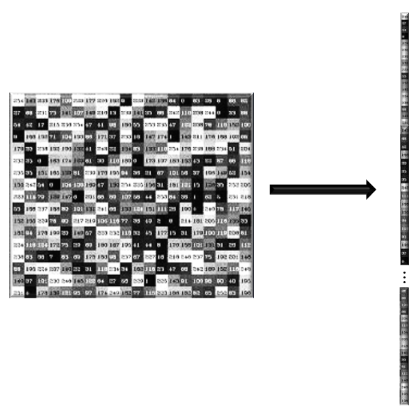  
</div>

**Primer 15.** Prebacivanje dvodimenzionalne tabele brojeva u jedan dug niz možemo da vršimo nadovezivanjem vrsta ili nadovezivanjem kolona te matrice. Recimo, matricu $A=[a_{ij}]\in\mathcal{M}_{2\times3}$ sa elementima $a_{ij}=i+j, i=\overline{0,1},j=\overline{0,2}$ predstavićemo kao vektor njenih vrednosti na dva načina. 

$$A=\begin{bmatrix}0&1&2\\1&2&3\end{bmatrix}
    \stackrel{\mbox{Nadovezivanjem vrsta}}{\mapsto} A_{[0]}=\big(0,\ 1,\ 2,\ |\ 1,\ 2,\ 3\big)$$    

$$A=\begin{bmatrix}0&1&2\\1&2&3\end{bmatrix}\stackrel{\mbox{Nadovezivanjem kolona}}{\mapsto} A_{[1]}=\big(0,\ 1,\ |\ 1,\ 2,\ |\ 2,\ 3\big).$$

In [71]:
kolona=(np.arange(2)).reshape(2,1)
vrsta=np.arange(3)
A=kolona+vrsta
A

array([[0, 1, 2],
       [1, 2, 3]])

In [72]:
vec0A=np.block([A[0],A[1]])
vec0A

array([0, 1, 2, 1, 2, 3])

In [73]:
vec1A=np.block([A[:,0],A[:,1],A[:,2]])
vec1A

array([0, 1, 1, 2, 2, 3])

Tehnički, ove vektorizacije se dobijaju sekvencijalnim obilaženjem elemenata matrice pomoću dve ugnježdene petlje. Razlika nastaje izborom rasporeda brojača po dubini, tj. brzine promene njihovih vrednosti.

|Nadovezivanje vrsta:| |Nadovezivanje kolona:| |
|:----|:---|:----|:---|
|$pozicija:=0$  | |  $pozicija:=0$| |
|$for\ i=\overline{0,1}:$ | | $for\ j=\overline{0,2}:$| |
|$\quad for\ j=\overline{0,2}:$| |$\quad for\ i=\overline{0,1}:$| |
|$\quad\quad vec(pozicija) $|$:=a_{ij}$|$\quad\quad vec(pozicija) $|$:=a_{ij}$|
|$\quad\quad pozicija++$| |$\quad\quad pozicija++$| |

In [74]:
v0=np.empty(2*3)
poz=0
for i in range(2):
    for j in range(3):
        v0[poz]=A[i,j]
        poz+=1
v0        

array([0., 1., 2., 1., 2., 3.])

In [75]:
v1=np.empty(2*3)
poz=0
for j in range(3):
    for i in range(2):
        v1[poz]=A[i,j]
        poz+=1
v1        

array([0., 1., 1., 2., 2., 3.])

Formule za dobijanje pozicije elementa u novom vektoru zavise od $i,j$ i dimenzija matrice:
\begin{align}
    &\mbox{Nadovezivanjem vrsta: }&&(i,j)\ \mapsto\ 3i+j,\\
    &\mbox{Nadovezivanjem kolona: }&&(i,j)\ \mapsto\ i+2j.
\end{align}

Dobijeni indeksi predstavljaju tzv. *linearne indekse* elemenata niza.

U opštem slučaju, za matricu $A\in\mathcal{M}_{m\times n}$ vektorizacija je preslikavanje
\begin{align}
\mathcal{M}_{m\times n}&\mapsto\mathbb{R}^{mn}\\
 A&\mapsto vec(A)
\end{align}
gde se $vec(A)=A_{[0]}$ dobija nadovezivanjem vrsta ili $vec(A)=A_{[1]}$ nadovezivanjem kolona.
Formule transformacije indeksa glase:
\begin{align}
    &\mbox{Nadovezivanjem vrsta: }&&(i,j)\ \mapsto\ n\,i+j,\\[4pt]
    &\mbox{Nadovezivanjem kolona: }&&(i,j)\ \mapsto\ i+m\,j.
\end{align}
Ove formule mogu da posluže i za rekonstrukciju matrice $A$ na osnovu vektora $vec(A),$
\begin{align}
    vec(A)=A_{[0]}\ :&\ k\ \mapsto\ (i,j),\quad i=k//n,\ j=k\%n,\\
    vec(A)=A_{[1]}\ :&\ k\ \mapsto\ (i,j),\quad j=k//m,\ i=k\%m,
\end{align}
gde su $//$ i $\%$ celobrojno deljenje i ostatak pri celobrojnom deljenju, redom.

Ugrađeni metod `reshape` koristi podrazumevano preuređenje NumPy niza po principu obilaženja vrsta (default).

In [76]:
A.reshape(6,)

array([0, 1, 2, 1, 2, 3])

Da bismo primenili obilaženje po kolonama koristimo opciju `order='F'`, ili transponovanje.

In [77]:
A.reshape((6,),order='F')

array([0, 1, 1, 2, 2, 3])

In [78]:
(A.T).reshape(6,)

array([0, 1, 1, 2, 2, 3])

***

Primer 15 je u vezi sa opcionim argumentom `axis` većine NumPy funkcija kada radimo sa višedimenzionalnim nizovima. 

**Primer 16.** Ukoliko tražimo maksimalnu vrednost matrice (dvodimenzionalnog niza), to možemo da radimo unutar cele matrice, duž svake kolone ili duž svake vrste. Za svaki od navedenih zadataka koristimo istu ugrađenu funkciju `max`. Razlike u dobijenim izlazima nastaju kroz opcioni argument `axis`. Kada se on ne navodi podrazumeva se pretraga unutar cele matrice.

In [79]:
M=np.array([[1,2,-3],[6,-6,0]])
np.max(M)

6

Postavljanjem opcionog argumenta `axis=0` ili `axis=1` definišemo pretragu duž svake kolone ili vrste, redom. Drugim rečima, nagoveštavamo koji indeks (prema njegovom rednom broju) se postavlja u najdublju petlju. Takvom indeksu se vrednosti najbrže menjanju.

Ukoliko postavimo `axis=0`, to znači da se indeks vrsta najbrže menja.

In [80]:
np.max(M,axis=0)

array([6, 2, 0])

S obzirom da matrica M ima tri kolone, izlaz prethodne kodne ćelije je troelemntni niz. Sadrži maksimalnu vrednost svake od kolona. Za sličan rezultat nad vrstama potrebno je postaviti da je indeks kolona sa najbržom promenom vrednosti.

In [81]:
np.max(M,axis=1)

array([2, 6])

Opcioni argument `axis` je validan za većinu obrađenih NumPy funkcija. Primenjuje sa za višedimenzionalne nizove bilo kog broja dimenzija.

***

**Primer 17.** Zgodno je na ovom mestu napraviti rezime načina indeksiranja nizova koje smo kroz časove do sada obradili. Primeri pojedinih načina biće prikazani na dvodimenzionalnom nizu $A$ $(4\times4),$ praćeni odgovarajućim grafičkim prikazom. Polja obojena plavom bojom označavaju indeksirana polja matrice $A.$  Iznad svake slike nalazi se kod kojim se indeksiraju obojena polja.


<div>
   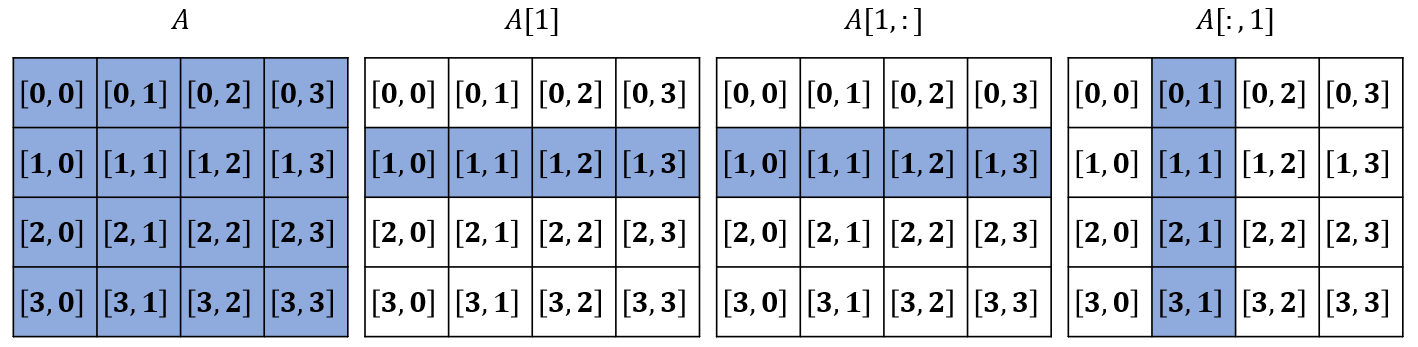  
</div>


<div>
   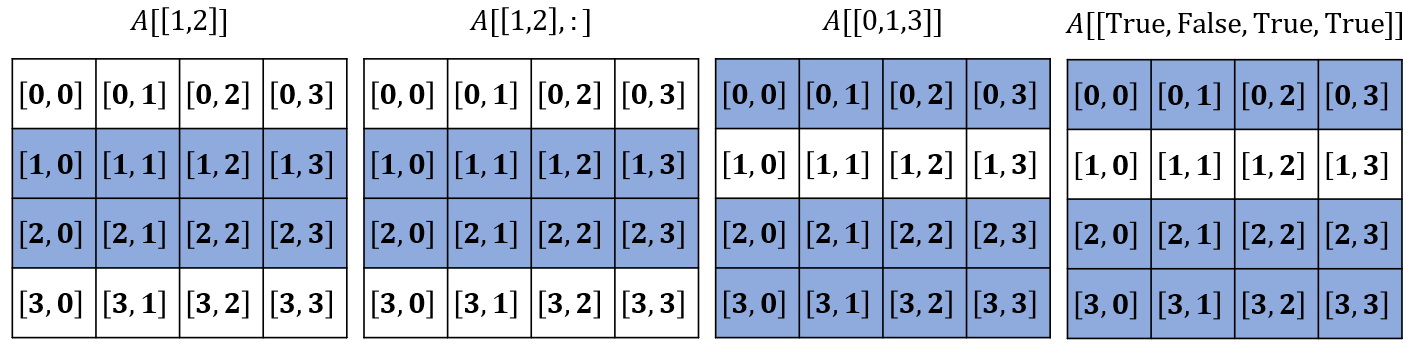  
</div>


<div>
   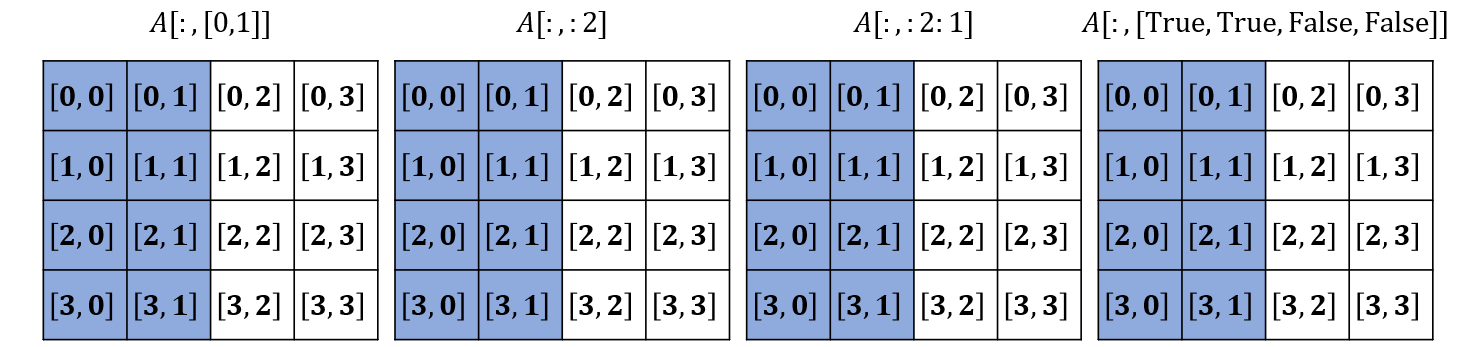  
</div>


<div>
   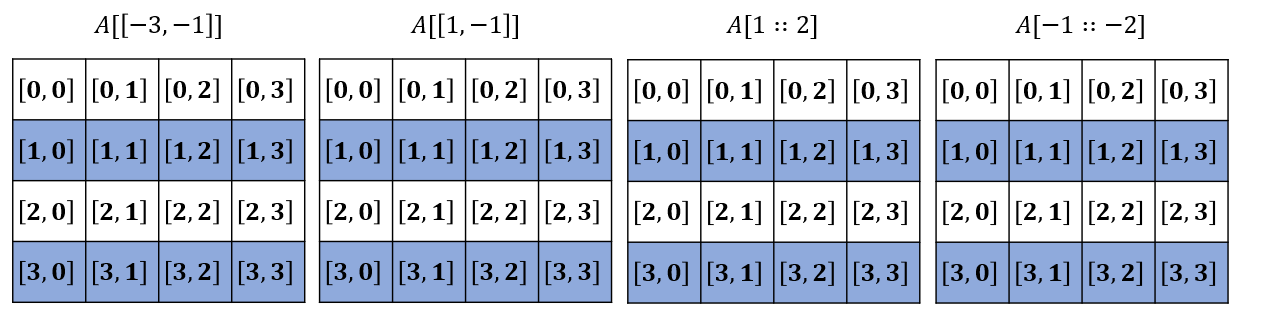  
</div>

<div>
   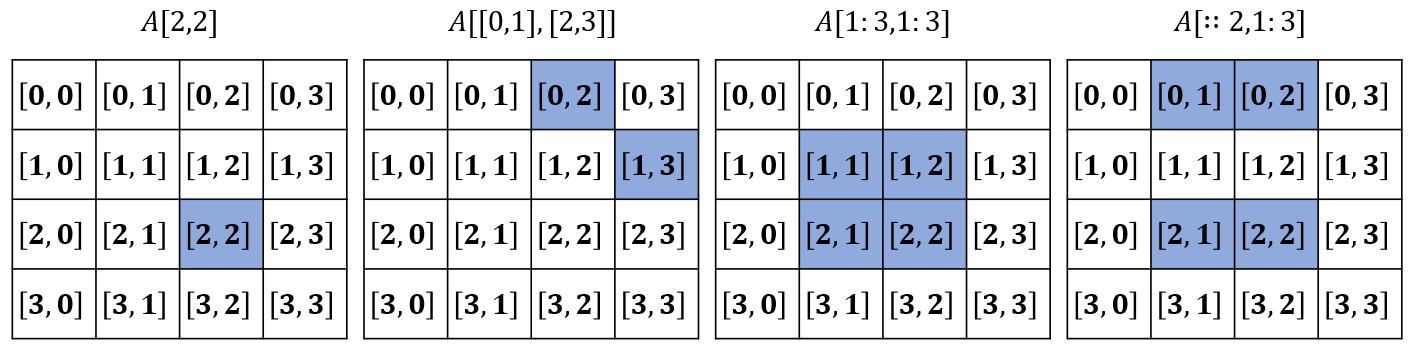  
</div>

Obratite pažnju na indeksiranje pozitivnim i negativnim brojevima iz primera u četvrtoj vrsti i koloni. Skupovno, iste vrste se indeksiraju. Međutim, kao uređeni skupovi, rezultati nisu isti.

In [82]:
A=(np.arange(16)).reshape(4,4)
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [83]:
print(A[1::2])

[[ 4  5  6  7]
 [12 13 14 15]]


In [84]:
print(A[-1::-2])

[[12 13 14 15]
 [ 4  5  6  7]]


Kao podsetnik, način indeksiranja eksplicitnim uključivanjem/isključivanjem elemenata preko dvodimenzionalnog niza logičkih vrednosti dat je narednim kodom.

In [85]:
Ind=rndm.randint(2,size=(4,4),dtype=bool)
print(A)
print(Ind)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[False False  True False]
 [False  True False  True]
 [False  True  True  True]
 [ True  True  True  True]]


In [86]:
print(A[Ind])

[ 2  5  7  9 10 11 12 13 14 15]


***

**Zadatak 3.** За дати низ `c = np.arange(2, 50, 5)`, свим компонентама низа које нису дељиве са 3 променити знак.

In [87]:
c = np.arange(2, 50, 5)
c

array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])

In [88]:
c[c%3!=0]

array([ 2,  7, 17, 22, 32, 37, 47])

In [89]:
c[c%3!=0]=-c[c%3!=0]
c

array([ -2,  -7,  12, -17, -22,  27, -32, -37,  42, -47])

***